In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

os.chdir('/home/st/st_us-053030/st_st161532/AiFakeDetection')

feature_path = 'data/Tinyfeatures_ResNet'
feature_path_DANN = 'data/Tinyfeatures_DANN3'
feature_path_Midjourney = 'data/Tinyfeatures_resnet_unchanged_midjourney'#_ResNetDANN_Midjourney'
feature_path_SD = 'data/Tinyfeatures_resnet_unchanged_SD1.4'#_ResNetDANN_Midjourney'
feature_path_BigGAN = 'data/Tinyfeatures_ResNetDANN_BigGAN'
feature_no_pretrain = 'data/Tinyfeatures_no_pretrain'

generators = os.listdir(feature_path_no_pretrain)
# generators = ['Midjourney']#generators[:1]

real_features = []
ai_features = {}
for generator in generators:
    print(generator)
    feature_vectors = np.stack([np.load(os.path.join(feature_path, generator,'ai', f)) for f in os.listdir(os.path.join(feature_path, generator, 'ai'))])
    ai_features[generator] = feature_vectors
    real_features.extend([np.load(os.path.join(feature_path, generator,'real', f)) for f in os.listdir(os.path.join(feature_path, generator, 'real'))])
real_features = np.stack(real_features)

glide
stable_diffusion_v_1_5
Midjourney
wukong
ADM
VQDM
BigGAN


In [2]:
all_features = np.concatenate([real_features] + [ai_features[generator] for generator in generators])
all_labels = np.concatenate([
    np.zeros(len(real_features)),
    *[
        (np.zeros(len(ai_features[generator])) + i + 1)
        for i, generator in enumerate(generators)
    ]
])

In [3]:
print(all_features[:10])

[[0.09355596 0.6608329  0.82713294 ... 0.04869665 0.09966498 0.12462971]
 [0.0442067  0.55746835 0.404864   ... 0.00241246 0.0096512  0.03963257]
 [0.0109684  0.2222068  0.4908879  ... 0.01414682 0.05619904 0.29938343]
 ...
 [0.01156627 0.52990836 0.4297171  ... 0.0585826  0.02845604 0.00156194]
 [0.         0.00441809 0.24517329 ... 0.         0.01526621 0.01999901]
 [0.14378779 0.32159644 1.0576967  ... 0.01230273 0.23795436 0.2860003 ]]


In [4]:
# do some analysis
real_features_mean = np.mean(real_features)
real_features_std = np.std(real_features)
ai_features_mean = {k: np.mean(v) for k, v in ai_features.items()}
ai_features_std = {k: np.std(v) for k, v in ai_features.items()}


# feature vector is 2048 long -> t-SNE to 2D
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_features = tsne.fit_transform(all_features)

# feature vector is 2048 long -> PCA to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(all_features)



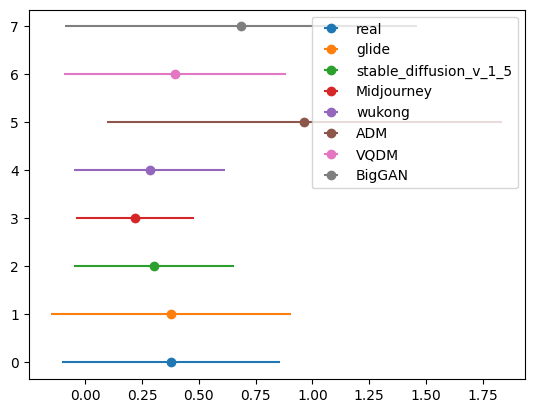

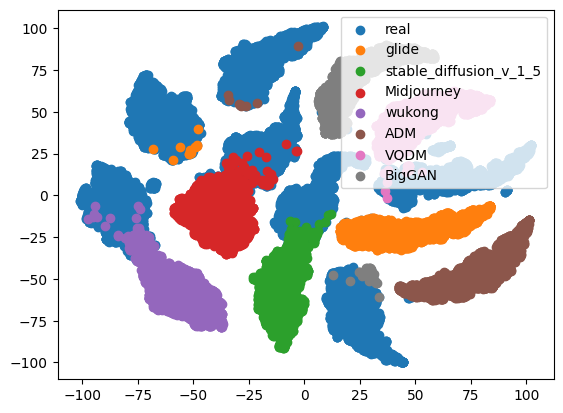

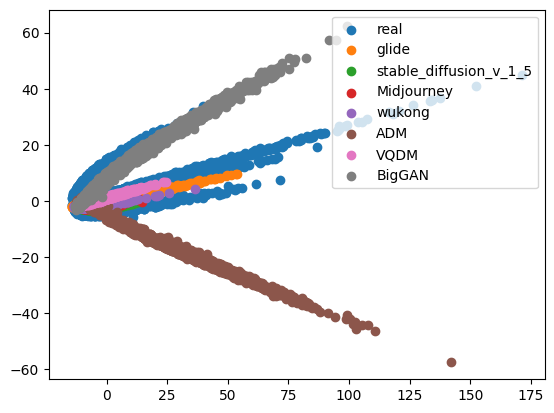

In [5]:

# plot the results

plt.figure()
# error bars
plt.errorbar(real_features_mean, 0, xerr=real_features_std, fmt='o', label='real')
for i,(k, v) in enumerate(ai_features_mean.items()):
    plt.errorbar(v, i+1, xerr=ai_features_std[k], fmt='o', label=k)
plt.legend(loc='best')
plt.show()


plt.figure()
plt.scatter(tsne_features[all_labels == 0, 0], tsne_features[all_labels == 0, 1], label='real')
for i,(k, v) in enumerate(ai_features.items()):
    plt.scatter(tsne_features[all_labels == i+1, 0], tsne_features[all_labels == i+1, 1], label=k)
plt.legend(loc='upper right')
plt.savefig('tsne.png',bbox_inches='tight')
plt.show()

plt.figure()
plt.scatter(pca_features[all_labels == 0, 0], pca_features[all_labels == 0, 1], label='real')
for i,(k, v) in enumerate(ai_features.items()):
    plt.scatter(pca_features[all_labels == i+1, 0], pca_features[all_labels == i+1, 1], label=k)
plt.legend(loc='upper right')
plt.show()


glide
stable_diffusion_v_1_5
Midjourney
wukong
ADM
VQDM
BigGAN
glide
stable_diffusion_v_1_5
Midjourney
wukong
ADM
VQDM
BigGAN
glide
stable_diffusion_v_1_5
Midjourney
wukong
ADM
VQDM
BigGAN


KeyboardInterrupt: 

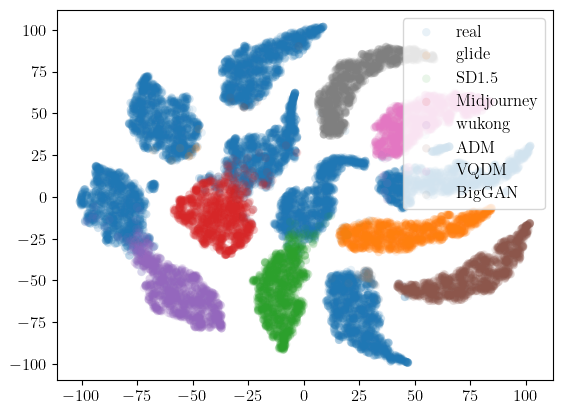

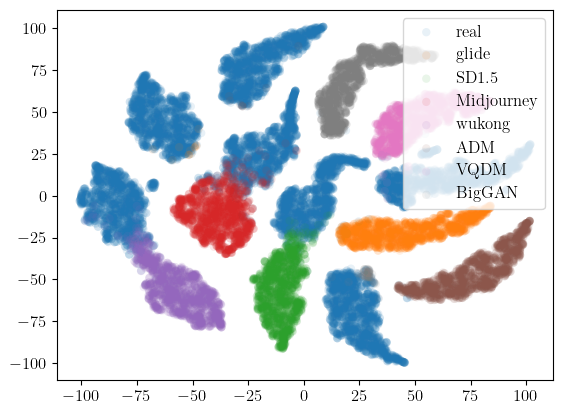

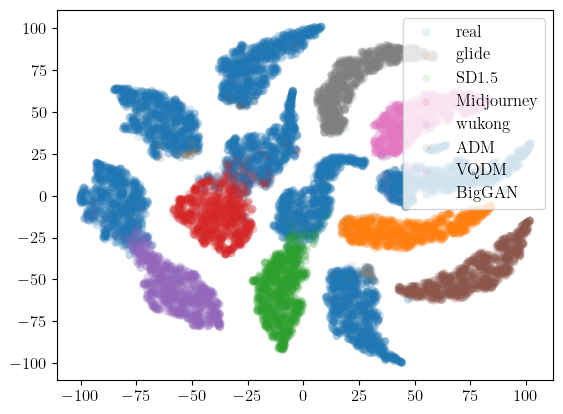

In [13]:
# same as above but as a loop saving the images
feature_path = 'data/Tinyfeatures_ResNet'
feature_path_DANN = 'data/Tinyfeatures_DANN3'
feature_path_Midjourney = 'data/Tinyfeatures_resnet_unchanged_midjourney'#_ResNetDANN_Midjourney'
feature_path_SD = 'data/Tinyfeatures_resnet_unchanged_SD1.4'#_ResNetDANN_Midjourney'
feature_path_BigGAN = 'data/Tinyfeatures_ResNetDANN_BigGAN'
feature_no_pretrain = 'data/Tinyfeatures_no_pretrain'
feature_fourier = 'data/Tinyfeatures_fourier_no_pretrain'
for path in [feature_fourier,feature_no_pretrain,feature_path_SD, feature_path_DANN]:

    generators = os.listdir(path)
    generators = [g for g in generators if os.path.isdir(os.path.join(path, g))]
    # generators = ['Midjourney']#generators[:1]

    real_features = []
    ai_features = {}
    for generator in generators:
        print(generator)
        feature_vectors = np.stack([np.load(os.path.join(feature_path, generator,'ai', f)) for f in os.listdir(os.path.join(feature_path, generator, 'ai'))])
        ai_features[generator] = feature_vectors
        real_features.extend([np.load(os.path.join(feature_path, generator,'real', f)) for f in os.listdir(os.path.join(feature_path, generator, 'real'))])
    real_features = np.stack(real_features)

    all_features = np.concatenate([real_features] + [ai_features[generator] for generator in generators])
    all_labels = np.concatenate([
        np.zeros(len(real_features)),
        *[
            (np.zeros(len(ai_features[generator])) + i + 1)
            for i, generator in enumerate(generators)
        ]
    ])

    # print(all_features[:10].shape)

    # do some analysis
    real_features_mean = np.mean(real_features)
    real_features_std = np.std(real_features)
    ai_features_mean = {k: np.mean(v) for k, v in ai_features.items()}
    ai_features_std = {k: np.std(v) for k, v in ai_features.items()}


    # feature vector is 2048 long -> t-SNE to 2D
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2)
    tsne_features = tsne.fit_transform(all_features)

    # plot the results
    plt.figure()
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.rc('font', size=12)
    plt.rc('legend', fontsize=12)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)

    # marker alpha should be 0.5 and no border
    plt.scatter(tsne_features[all_labels == 0, 0], tsne_features[all_labels == 0, 1], label='real', alpha=0.1, edgecolors='none')
    for i,(k, v) in enumerate(ai_features.items()):
        if k=='stable_diffusion_v_1_5':
            k='SD1.5'
        plt.scatter(tsne_features[all_labels == i+1, 0], tsne_features[all_labels == i+1, 1], label=k, alpha=0.1, edgecolors='none')
    plt.legend(loc='upper right')
    plt.savefig(os.path.join(path, 'tsne2.pdf'),bbox_inches='tight')
